2. Comprensión inicial del dataset

In [2]:
# Importar librerías
import pandas as pd
import os

# Ruta del dataset
ruta = os.path.join("..", "data", "raw", "Base.xlsx")

# a. Cargar el dataset y visualizar primeras filas
df = pd.read_excel(ruta)
df.head()

,Año,Sucursal,Mes,Semana,Producto,Valores,Unidades
0,2024,Sucursal 001,1,1,PRODUCTO 1,249,1
1,2024,Sucursal 001,1,1,PRODUCTO 2,378,1
2,2024,Sucursal 001,1,1,PRODUCTO 6,803,2
3,2024,Sucursal 001,1,1,PRODUCTO 7,2857,5
4,2024,Sucursal 001,1,1,PRODUCTO 8,1715,3


b. Mostrar el tamaño del dataset (número de filas y columnas).

In [3]:
print("Número de filas y columnas:")
df.shape

Número de filas y columnas:


(24518, 7)

c. Describir brevemente qué representa cada columna (sucursal, producto, fecha, ventas u otras variables relevantes).

In [4]:
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24518 entries, 0 to 24517
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Año       24518 non-null  int64 
 1   Sucursal  24518 non-null  object
 2   Mes       24518 non-null  int64 
 3   Semana    24518 non-null  int64 
 4   Producto  24518 non-null  object
 5   Valores   24518 non-null  int64 
 6   Unidades  24518 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.3+ MB


d. Identificar el rango temporal de los datos (fecha mínima y máxima).

In [5]:
print("Año mínimo:", df["Año"].min())
print("Año máximo:", df["Año"].max())
print("Mes mínimo:", df["Mes"].min())
print("Mes máximo:", df["Mes"].max())
print("Semana mínima:", df["Semana"].min())
print("Semana máxima:", df["Semana"].max())

Año mínimo: 2024
Año máximo: 2025
Mes mínimo: 1
Mes máximo: 12
Semana mínima: 1
Semana máxima: 49


Contar valores nulos

In [6]:
print("\nValores nulos por columna:")
df.isnull().sum()


Valores nulos por columna:


Año         0
Sucursal    0
Mes         0
Semana      0
Producto    0
Valores     0
Unidades    0
dtype: int64

In [8]:
for col in ['Sucursal', 'Producto']:
    if col in df.columns:
        print(f"\nValores únicos en {col}:")
        print(df[col].unique())


Valores únicos en Sucursal:
['Sucursal 001' 'Sucursal 002' 'Sucursal 003' 'Sucursal 004'
 'Sucursal 005' 'Sucursal 006' 'Sucursal 007' 'Sucursal 008'
 'Sucursal 009' 'Sucursal 010' 'Sucursal 011' 'Sucursal 012'
 'Sucursal 013' 'Sucursal 014' 'Sucursal 015' 'Sucursal 016'
 'Sucursal 017' 'Sucursal 018' 'Sucursal 019' 'Sucursal 020'
 'Sucursal 021' 'Sucursal 022' 'Sucursal 023' 'Sucursal 024'
 'Sucursal 025' 'Sucursal 026' 'Sucursal 027' 'Sucursal 028'
 'Sucursal 029' 'Sucursal 030' 'Sucursal 031' 'Sucursal 032'
 'Sucursal 033' 'Sucursal 034' 'Sucursal 035' 'Sucursal 036'
 'Sucursal 037' 'Sucursal 038' 'Sucursal 039' 'Sucursal 040'
 'Sucursal 041' 'Sucursal 042' 'Sucursal 043' 'Sucursal 044'
 'Sucursal 045' 'Sucursal 046' 'Sucursal 047' 'Sucursal 048'
 'Sucursal 049' 'Sucursal 050' 'Sucursal 051' 'Sucursal 052'
 'Sucursal 053' 'Sucursal 054' 'Sucursal 055' 'Sucursal 056'
 'Sucursal 057' 'Sucursal 058' 'Sucursal 059' 'Sucursal 060'
 'Sucursal 061' 'Sucursal 062' 'Sucursal 063' 'Sucursal 

3. Validación de la estructura de los datos

a. Verificar los tipos de datos de cada variable (fecha, numérica, categórica).

In [9]:
print("\n=== 3.a) Tipos de datos de cada variable ===")
print(df.dtypes)


=== 3.a) Tipos de datos de cada variable ===
Año          int64
Sucursal    object
Mes          int64
Semana       int64
Producto    object
Valores      int64
Unidades     int64
dtype: object


b. Confirmar que la columna de fecha esté correctamente formateada como tipo datetime.

In [10]:
# Crear columna de fecha basada en Año + Semana (lunes de cada semana)
df["Fecha"] = pd.to_datetime(df["Año"].astype(str) + "-W" + df["Semana"].astype(str) + "-1", format="%G-W%V-%u")

print("\nColumna 'Fecha' creada correctamente:")
print(df[["Año", "Semana", "Fecha"]].head())

print("\nTipos después de agregar 'Fecha':")
print(df.dtypes)


Columna 'Fecha' creada correctamente:
    Año  Semana      Fecha
0  2024       1 2024-01-01
1  2024       1 2024-01-01
2  2024       1 2024-01-01
3  2024       1 2024-01-01
4  2024       1 2024-01-01

Tipos después de agregar 'Fecha':
Año                  int64
Sucursal            object
Mes                  int64
Semana               int64
Producto            object
Valores              int64
Unidades             int64
Fecha       datetime64[ns]
dtype: object


c. Validar que la frecuencia temporal sea consistente (diaria, semanal, mensual).

In [11]:
# Ordenamos el dataframe por fecha
df = df.sort_values("Fecha")

# Calculamos diferencias entre fechas consecutivas
df["Dif_Dias"] = df["Fecha"].diff().dt.days

print("\nEjemplo de diferencias entre fechas consecutivas:")
print(df["Dif_Dias"].value_counts().head(10))

print("\nFrecuencias encontradas (días entre registros):")
print(df["Dif_Dias"].describe())


Ejemplo de diferencias entre fechas consecutivas:
Dif_Dias
0.0     24497
28.0       13
35.0        7
Name: count, dtype: int64

Frecuencias encontradas (días entre registros):
count    24517.000000
mean         0.024840
std          0.874576
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: Dif_Dias, dtype: float64


4. Análisis de valores faltantes y duplicados

a. Identificar columnas con valores nulos y el porcentaje de datos faltantes.

In [15]:
print("\nValores nulos por columna:")
nulidad = df.isnull().sum()
porcentaje = (df.isnull().sum() / len(df)) * 100

df_nulos = pd.DataFrame({
    "Valores Nulos": nulidad,
    "Porcentaje %": porcentaje.round(2)
})

df_nulos


Valores nulos por columna:


,Valores Nulos,Porcentaje %
Año,0,0.0
Sucursal,0,0.0
Mes,0,0.0
Semana,0,0.0
Producto,0,0.0
Valores,0,0.0
Unidades,0,0.0
Fecha,0,0.0
Dif_Dias,0,0.0


b. Definir estrategia para tratar valores faltantes

In [14]:
df = df.dropna(subset=["Dif_Dias"])

Se eliminó una única fila (0.004% del total) debido a que Dif_Dias no puede calcularse en el primer registro temporal. La imputación con 0 generaría una interpretación incorrecta.

c. Verificar y justificar cómo se manejarán registros duplicados.

In [16]:
# Contar duplicados
duplicados = df.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicados}")

# Mostrar algunos duplicados (si existen)
if duplicados > 0:
    display(df[df.duplicated()].head())

Registros duplicados encontrados: 0


Durante el análisis de registros duplicados se verificó si existían filas repetidas completamente en el dataset.
El resultado fue de 0 duplicados, lo cual indica que la fuente de datos no presenta redundancia que pueda afectar cálculos de ventas, promedios o agregados.
Debido a esto, no fue necesario aplicar corrección adicional mediante eliminación (drop_duplicates()).

5. Análisis descriptivo general

a. Calcular métricas estadísticas básicas: media, mediana, mínimo, máximo, desviación estándar.

In [17]:
print("📌 Métricas estadísticas básicas de ventas (Valores):")
print(df["Valores"].describe())  # media, mediana, min, max, std y más

print("\n➡️ Media:", df["Valores"].mean())
print("➡️ Mediana:", df["Valores"].median())
print("➡️ Mínimo:", df["Valores"].min())
print("➡️ Máximo:", df["Valores"].max())
print("➡️ Desviación estándar:", df["Valores"].std())

📌 Métricas estadísticas básicas de ventas (Valores):
count    24517.000000
mean       872.936901
std        899.097286
min         58.000000
25%        400.000000
50%        572.000000
75%       1143.000000
max      27141.000000
Name: Valores, dtype: float64

➡️ Media: 872.9369009258882
➡️ Mediana: 572.0
➡️ Mínimo: 58
➡️ Máximo: 27141
➡️ Desviación estándar: 899.0972857968175


b. Analizar distribución de ventas por:

In [18]:
# Distribución por producto
ventas_por_producto = df.groupby("Producto")["Valores"].sum().sort_values(ascending=False)
print("\n📊 Ventas por Producto:")
print(ventas_por_producto)


📊 Ventas por Producto:
Producto
PRODUCTO 10    8555782
PRODUCTO 8     3620136
PRODUCTO 7     2445575
PRODUCTO 6     2413802
PRODUCTO 9     1857792
PRODUCTO 2     1106682
PRODUCTO 4      848875
PRODUCTO 5      305606
PRODUCTO 3      140543
PRODUCTO 1      107001
Name: Valores, dtype: int64


<Axes: title={'center': 'Ventas por Producto'}, xlabel='Producto'>

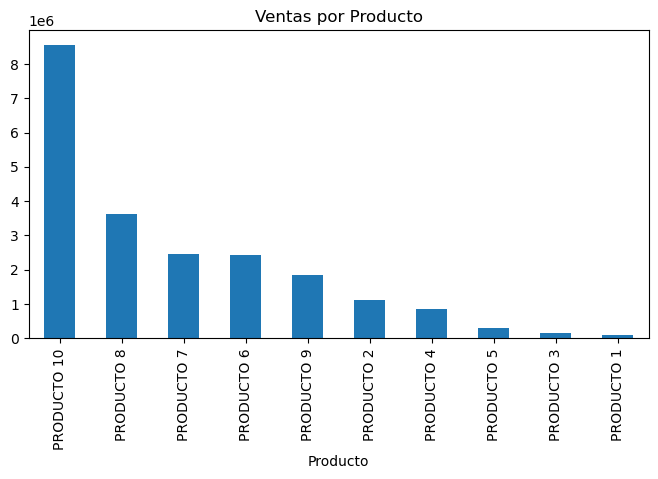

In [19]:
ventas_por_producto.plot(kind="bar", figsize=(8,4), title="Ventas por Producto")


📌 Top 10 Sucursales con mayor venta:
Sucursal
Sucursal 263    362191
Sucursal 182    266653
Sucursal 219    264701
Sucursal 274    237783
Sucursal 149    230485
Sucursal 016    213465
Sucursal 190    200808
Sucursal 001    179567
Sucursal 179    176505
Sucursal 080    171161
Name: Valores, dtype: int64


<Axes: title={'center': 'Top 10 Sucursales con mayor venta'}, xlabel='Sucursal'>

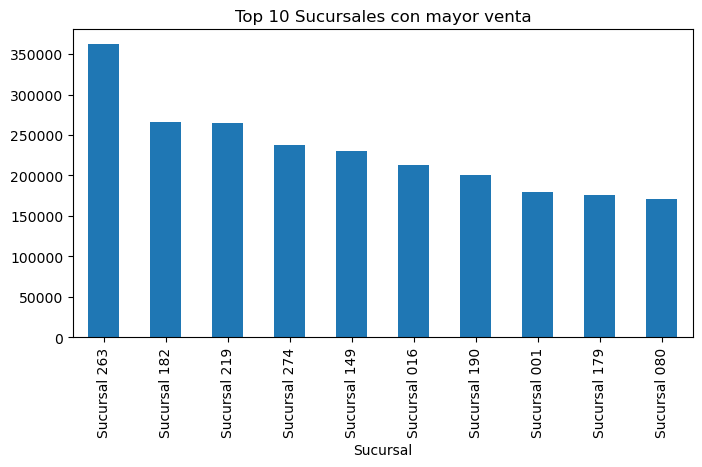

In [20]:
# Distribución por sucursal (top 10)
ventas_por_sucursal = df.groupby("Sucursal")["Valores"].sum().sort_values(ascending=False).head(10)
print("\n📌 Top 10 Sucursales con mayor venta:")
print(ventas_por_sucursal)

ventas_por_sucursal.plot(kind="bar", figsize=(8,4), title="Top 10 Sucursales con mayor venta")

Distribución por periodo de tiempo

In [24]:
# Ventas por día
ventas_por_dia = df.groupby("Fecha")["Valores"].sum()
print("\n Ventas por Día:")
print(ventas_por_dia.head())


 Ventas por Día:
Fecha
2024-01-01    1055859
2024-01-29    1064423
2024-02-26    1222046
2024-04-01    1193041
2024-04-29    1331557
Name: Valores, dtype: int64


In [25]:
# Ventas por semana
ventas_por_semana = df.groupby("Semana")["Valores"].sum()
print("\n Ventas por Semana:")
print(ventas_por_semana)


 Ventas por Semana:
Semana
1     2064538
5     1961145
9     2261196
14    2307504
18    2582984
22    1117591
23    1096546
27    2104202
31    1854440
36    1585653
40     831906
44     770618
49     863471
Name: Valores, dtype: int64



 Ventas por Mes:
Mes
1     2064538
2     1961145
3     2261196
4     2307504
5     2582984
6     2214137
7     2104202
8     1854440
9     1585653
10     831906
11     770618
12     863471
Name: Valores, dtype: int64


<Axes: title={'center': 'Ventas por Mes'}, xlabel='Mes'>

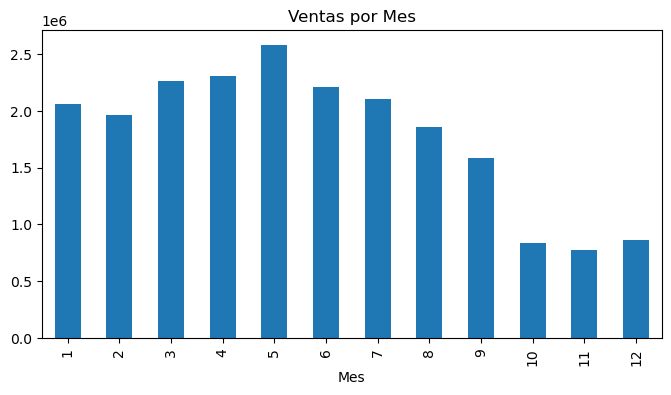

In [26]:
# Ventas por mes
ventas_por_mes = df.groupby("Mes")["Valores"].sum()
print("\n Ventas por Mes:")
print(ventas_por_mes)

ventas_por_mes.plot(kind="bar", figsize=(8,4), title="Ventas por Mes")


📅 Ventas por Año:
Año
2024    12364260
2025     9037534
Name: Valores, dtype: int64


<Axes: title={'center': 'Ventas por Año'}, xlabel='Año'>

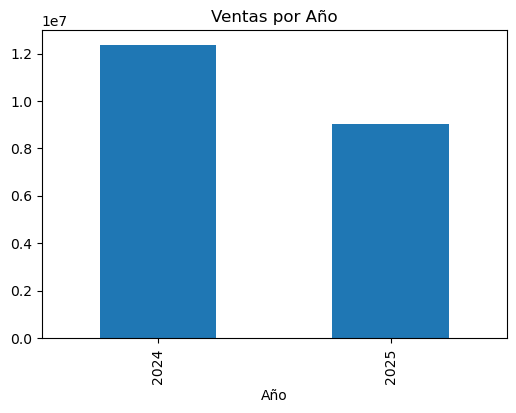

In [27]:
# Ventas por año
ventas_por_anio = df.groupby("Año")["Valores"].sum()
print("\n📅 Ventas por Año:")
print(ventas_por_anio)

ventas_por_anio.plot(kind="bar", figsize=(6,4), title="Ventas por Año")

6. Exploración temporal

In [29]:
df = df.sort_values("Fecha")

a. Graficar la evolución de ventas a lo largo del tiempo.

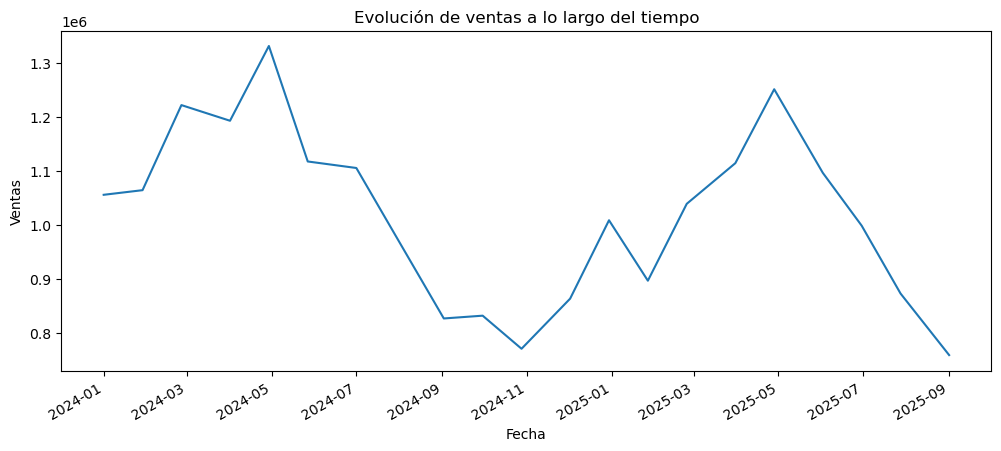

In [30]:
import matplotlib.pyplot as plt

# Ventas por fecha
ventas_diarias = df.groupby("Fecha")["Valores"].sum()

plt.figure(figsize=(12,5))
ventas_diarias.plot()
plt.title("Evolución de ventas a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

b. Identificar patrones de:

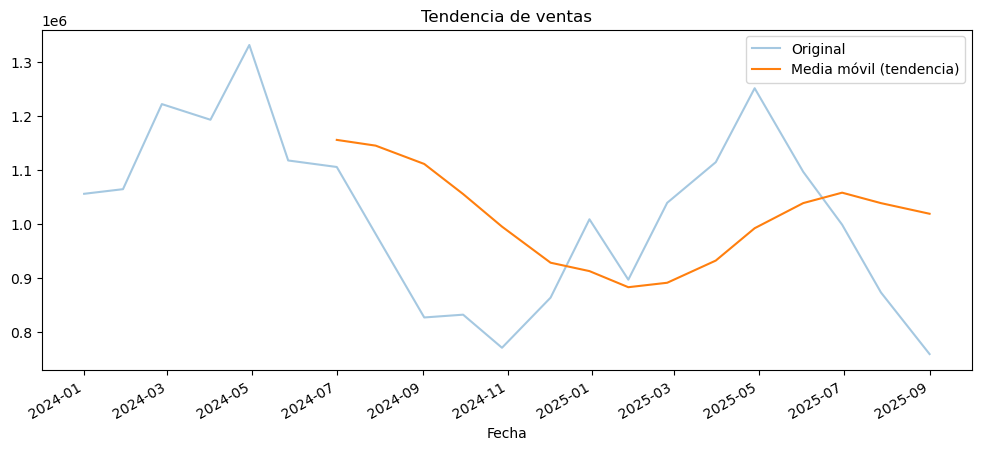

In [33]:
# i. Tendencia
# Media móvil de 7 días
rolling = ventas_diarias.rolling(window=7).mean()

plt.figure(figsize=(12,5))
ventas_diarias.plot(alpha=0.4, label="Original")
rolling.plot(label="Media móvil (tendencia)")
plt.title("Tendencia de ventas")
plt.legend()
plt.show()

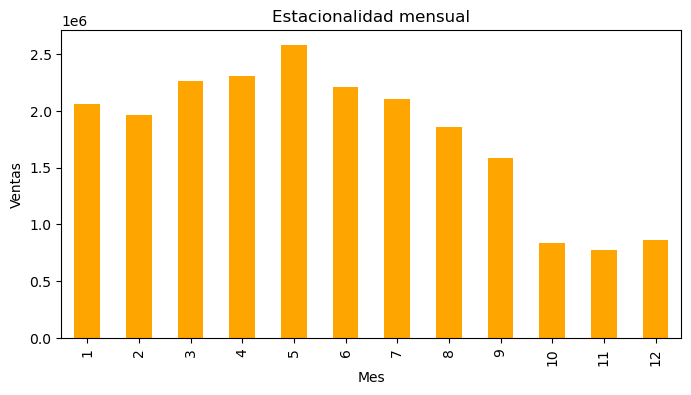

In [34]:
# ii. Estacionalidad
ventas_mes = df.groupby("Mes")["Valores"].sum()

plt.figure(figsize=(8,4))
ventas_mes.plot(kind="bar", color="orange")
plt.title("Estacionalidad mensual")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.show()

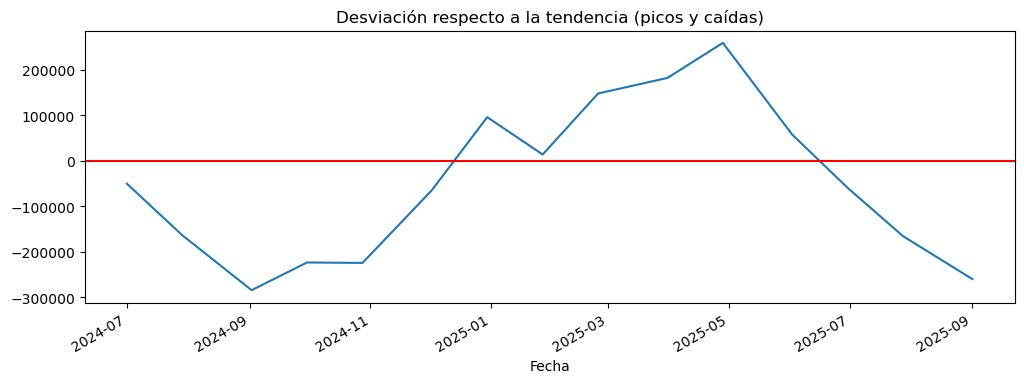

In [35]:
# iii. Picos y caídas abruptas
# Diferencia entre ventas y tendencia
desviacion = ventas_diarias - rolling

plt.figure(figsize=(12,4))
desviacion.plot()
plt.axhline(0, color='red')
plt.title("Desviación respecto a la tendencia (picos y caídas)")
plt.show()

iv. Analizar ciclos por días de la semana o meses

In [36]:
df["Dia_Semana"] = df["Fecha"].dt.day_name()

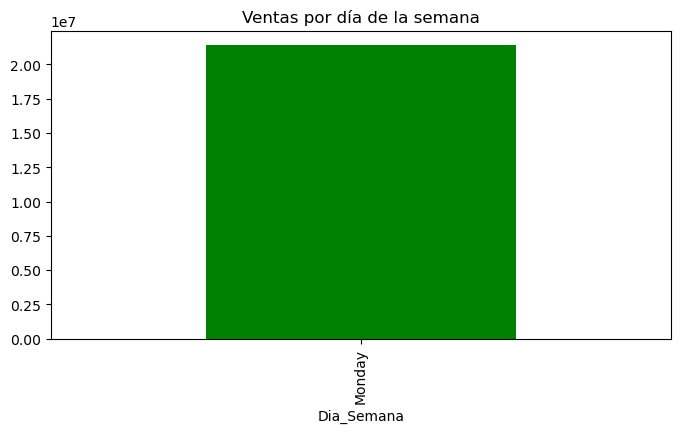

In [38]:
# Ventas por día de la semana:
ventas_diasemana = df.groupby("Dia_Semana")["Valores"].sum().sort_values()

plt.figure(figsize=(8,4))
ventas_diasemana.plot(kind="bar", color="green")
plt.title("Ventas por día de la semana")
plt.show()

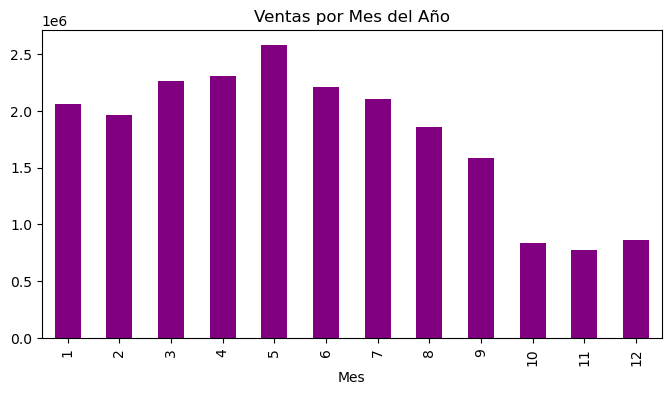

In [39]:
# Ventas por mes
ventas_mes = df.groupby("Mes")["Valores"].sum()

plt.figure(figsize=(8,4))
ventas_mes.plot(kind="bar", color="purple")
plt.title("Ventas por Mes del Año")
plt.show()

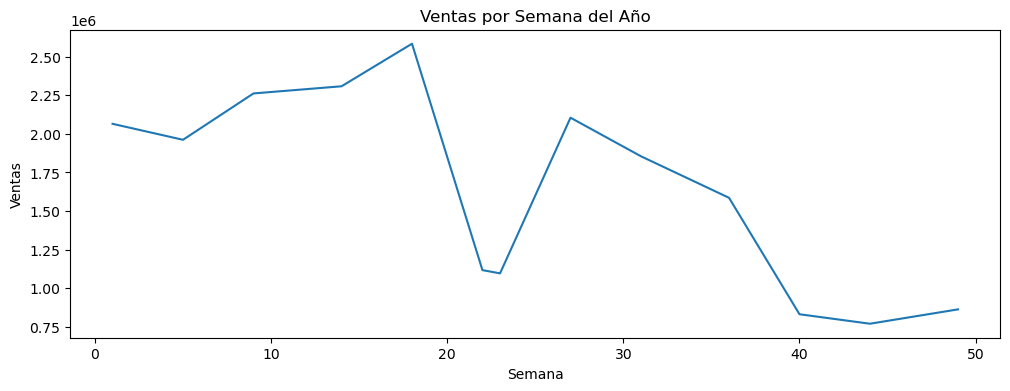

In [40]:
# estacionalidad semanal
ventas_semana = df.groupby("Semana")["Valores"].sum()

plt.figure(figsize=(12,4))
ventas_semana.plot()
plt.title("Ventas por Semana del Año")
plt.xlabel("Semana")
plt.ylabel("Ventas")
plt.show()

7. Análisis comparativo entre sucursales y productos

a. Identificar productos más vendidos y menos vendidos.

📊 Top productos más vendidos:
Producto
PRODUCTO 10    8555782
PRODUCTO 8     3620136
PRODUCTO 7     2445575
PRODUCTO 6     2413802
PRODUCTO 9     1857792
Name: Valores, dtype: int64

📉 Productos menos vendidos:
Producto
PRODUCTO 2    1106682
PRODUCTO 4     848875
PRODUCTO 5     305606
PRODUCTO 3     140543
PRODUCTO 1     107001
Name: Valores, dtype: int64


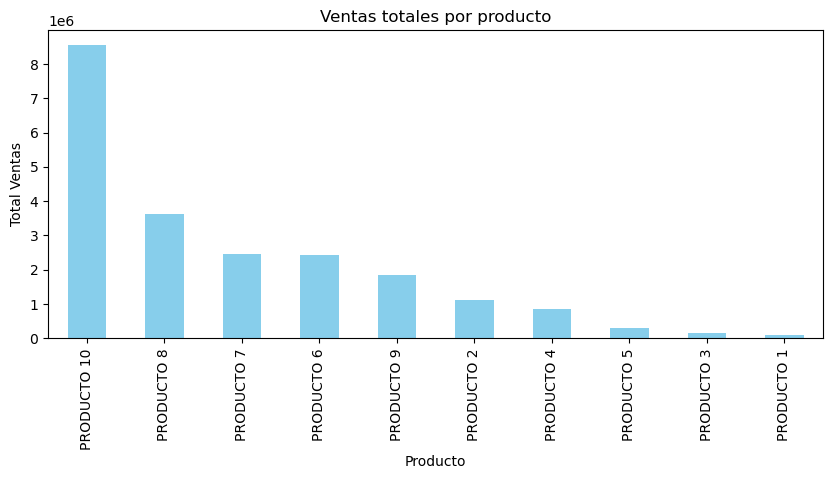

In [41]:
ventas_por_producto = df.groupby("Producto")["Valores"].sum().sort_values(ascending=False)

print("📊 Top productos más vendidos:")
print(ventas_por_producto.head(5))

print("\n📉 Productos menos vendidos:")
print(ventas_por_producto.tail(5))

# Visualización
ventas_por_producto.plot(kind="bar", figsize=(10,4), color="skyblue", title="Ventas totales por producto")
plt.ylabel("Total Ventas")
plt.show()

b. Comparar desempeño entre sucursales.


 Top 10 sucursales con mayores ventas:
Sucursal
Sucursal 263    362191
Sucursal 182    266653
Sucursal 219    264701
Sucursal 274    237783
Sucursal 149    230485
Sucursal 016    213465
Sucursal 190    200808
Sucursal 001    179567
Sucursal 179    176505
Sucursal 080    171161
Name: Valores, dtype: int64


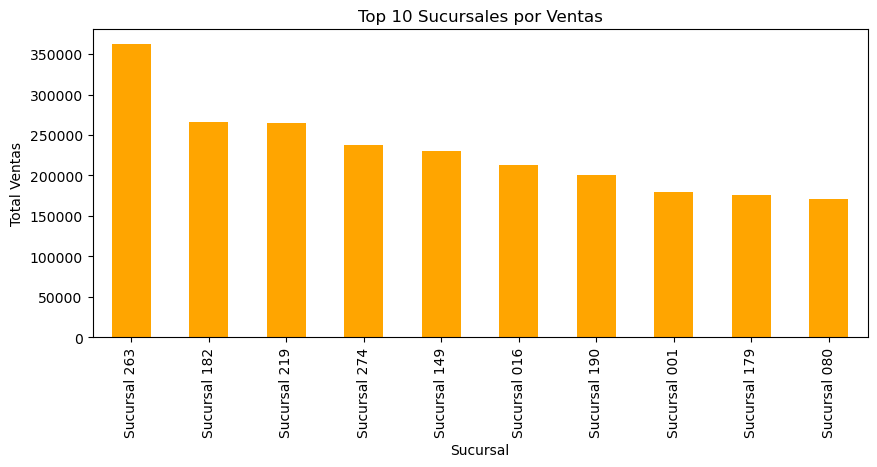

In [42]:
ventas_sucursal = df.groupby("Sucursal")["Valores"].sum().sort_values(ascending=False)

print("\n Top 10 sucursales con mayores ventas:")
print(ventas_sucursal.head(10))

ventas_sucursal.head(10).plot(kind="bar", figsize=(10,4), color="orange", title="Top 10 Sucursales por Ventas")
plt.ylabel("Total Ventas")
plt.show()

c. Detectar outliers o comportamientos anómalos por sucursal o producto.

In [43]:
# se detecta los outliers con método del rango intercuartílico (IQR)
Q1 = df["Valores"].quantile(0.25)
Q3 = df["Valores"].quantile(0.75)
IQR = Q3 - Q1

# Definimos límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["Valores"] < limite_inferior) | (df["Valores"] > limite_superior)]

print(f" Registros anómalos detectados: {len(outliers)}")
display(outliers.head())

 Registros anómalos detectados: 1770


,Año,Sucursal,Mes,Semana,Producto,Valores,Unidades,Fecha,Dif_Dias,Dia_Semana
5907,2024,Sucursal 145,1,1,PRODUCTO 10,3143,2,2024-01-01,0.0,Monday
6082,2024,Sucursal 149,1,1,PRODUCTO 6,2409,6,2024-01-01,0.0,Monday
5298,2024,Sucursal 128,1,1,PRODUCTO 10,2629,1,2024-01-01,0.0,Monday
4867,2024,Sucursal 117,1,1,PRODUCTO 10,2572,1,2024-01-01,0.0,Monday
4659,2024,Sucursal 113,1,1,PRODUCTO 10,2457,1,2024-01-01,0.0,Monday


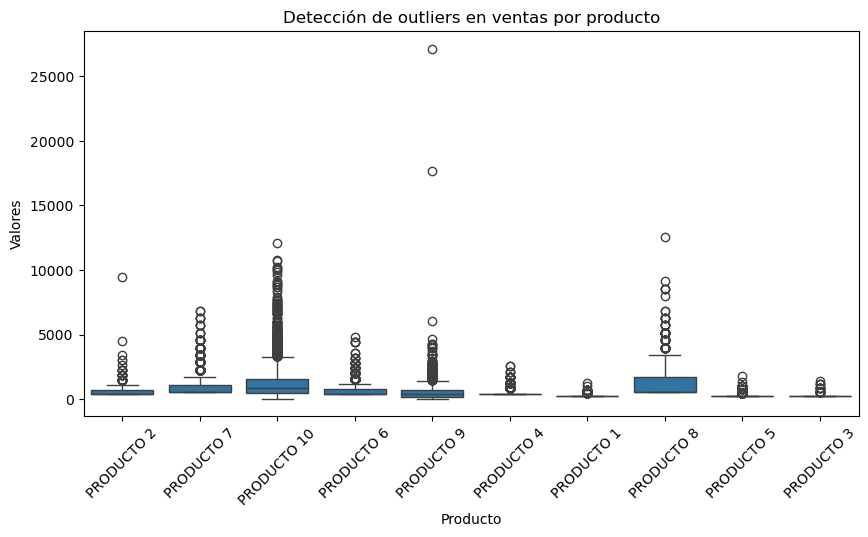

In [44]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x="Producto", y="Valores", data=df)
plt.title("Detección de outliers en ventas por producto")
plt.xticks(rotation=45)
plt.show()

8. Visualizaciones clave (obligatorias)

In [45]:
# formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

a. Series de tiempo de ventas totales.

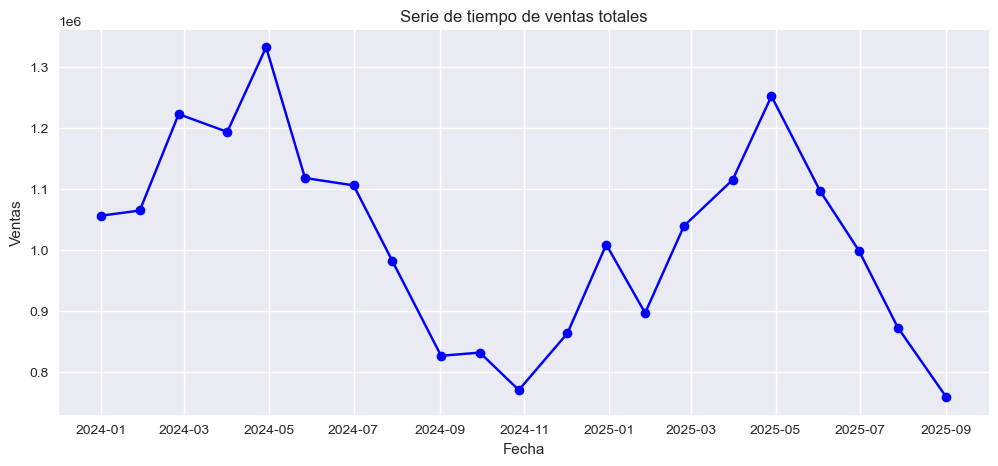

In [49]:
# Serie de tiempo de ventas totales
ventas_diarias = df.groupby("Fecha")["Valores"].sum()

plt.figure(figsize=(12,5))
plt.plot(ventas_diarias, marker="o", linestyle="-", color="blue")
plt.title("Serie de tiempo de ventas totales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

b. Gráfico de barras comparando ventas por sucursal.

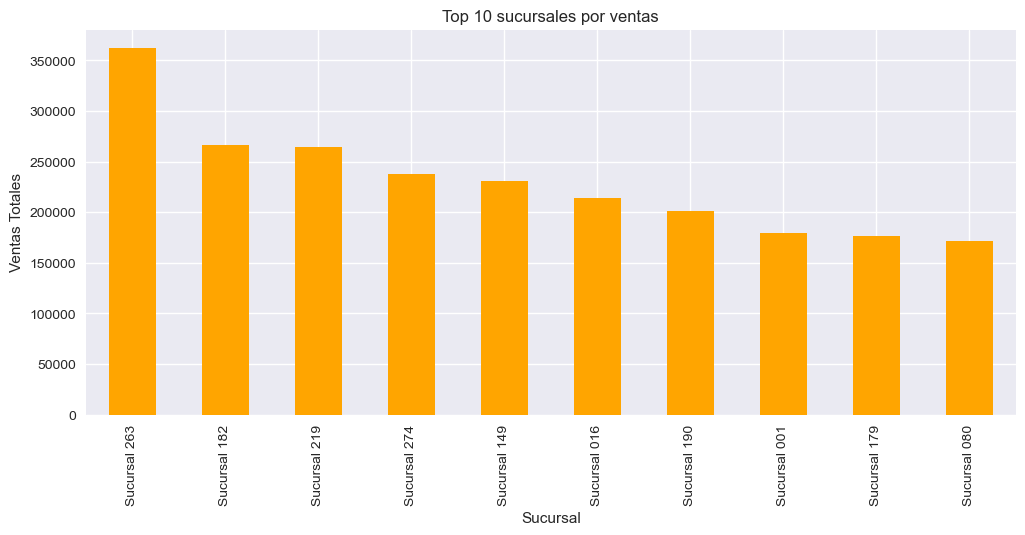

In [50]:
# Ventas por sucursal (Top 10)
ventas_sucursal = df.groupby("Sucursal")["Valores"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
ventas_sucursal.plot(kind="bar", color="orange")
plt.title("Top 10 sucursales por ventas")
plt.xlabel("Sucursal")
plt.ylabel("Ventas Totales")
plt.show()

c. Gráfico de barras comparando ventas por producto.

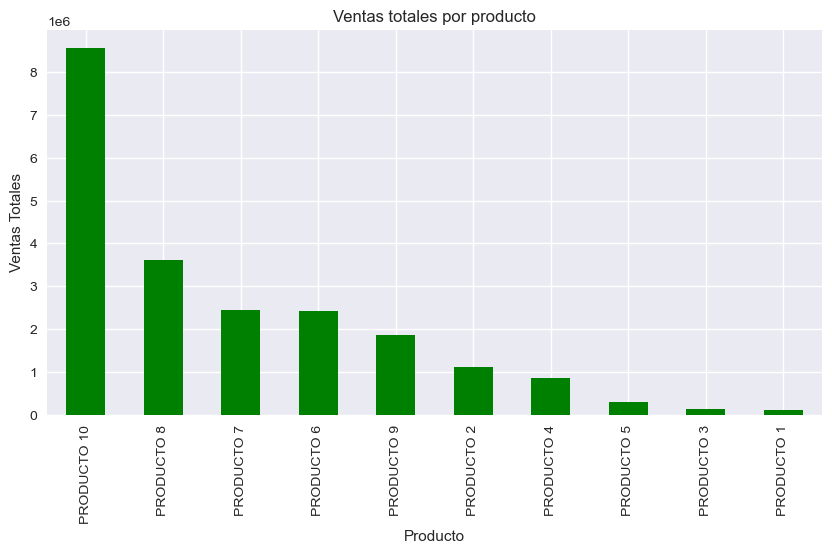

In [51]:
# Ventas por producto
ventas_producto = df.groupby("Producto")["Valores"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
ventas_producto.plot(kind="bar", color="green")
plt.title("Ventas totales por producto")
plt.xlabel("Producto")
plt.ylabel("Ventas Totales")
plt.show()

d. Heatmap o matriz para visualizar comportamiento de ventas en el tiempo y por sucursal/producto.

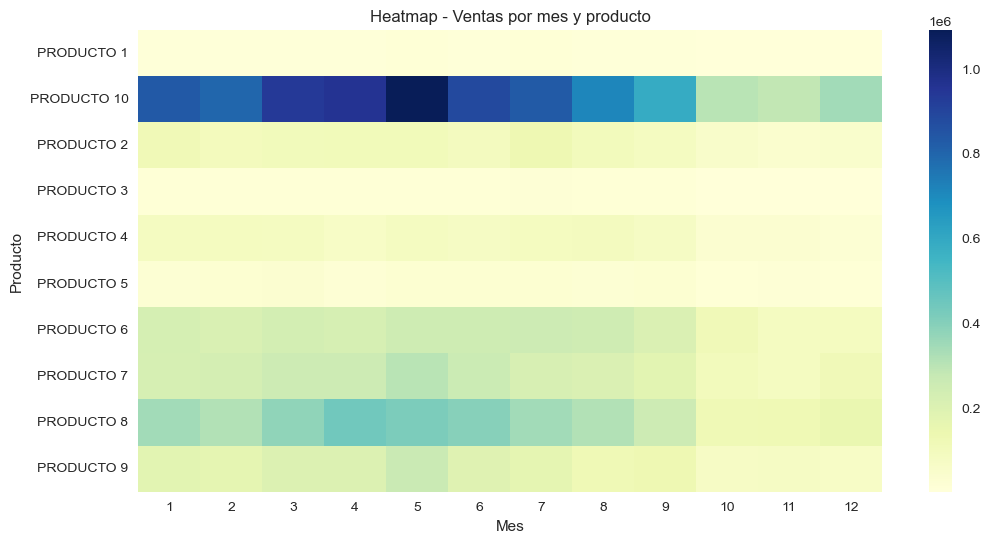

In [52]:
# Heatmap: ventas por mes y producto
pivot_prod_mes = df.pivot_table(values="Valores", index="Producto", columns="Mes", aggfunc="sum")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_prod_mes, cmap="YlGnBu", annot=False)
plt.title("Heatmap - Ventas por mes y producto")
plt.show()

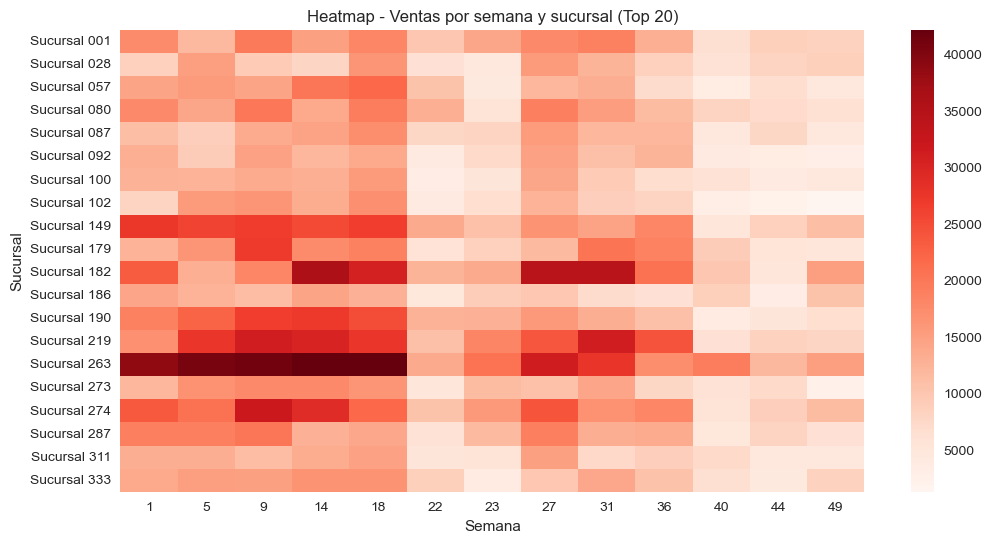

In [53]:
# Heatmap de ventas por semana y sucursal (Top 20 para claridad)
# Seleccionar top sucursales
top_suc = df["Sucursal"].value_counts().head(20).index
temp = df[df["Sucursal"].isin(top_suc)]

pivot_sem_suc = temp.pivot_table(values="Valores", index="Sucursal", columns="Semana", aggfunc="sum")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_sem_suc, cmap="Reds")
plt.title("Heatmap - Ventas por semana y sucursal (Top 20)")
plt.show()